In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE_clean.csv")

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1,2012-06-01
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1,2012-06-02
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1,2012-06-03
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1,2012-06-04
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1,2012-06-05


In [4]:
df=df.drop("date",True)

In [5]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,243.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.035391,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


- FFMC --> large difference between the min value and 25% to max value
- DMC,DC,BUI,rain  --> large difference between the min value -75% and max value

 so there are major  outliers present in these features

In [6]:
def plot_dist(col,df):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 5))
    ax1 =sns.distplot(df[col],ax=ax1) 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}') 
    ax2 = sns.boxplot(data = df, x=col,ax=ax2);
    ax2.set_title(f'{col}') 
    ax2.set_xlabel(f'{col}')
    plt.figure(figsize=(30, 15))
    plt.show()

- **with respect to FFMC**

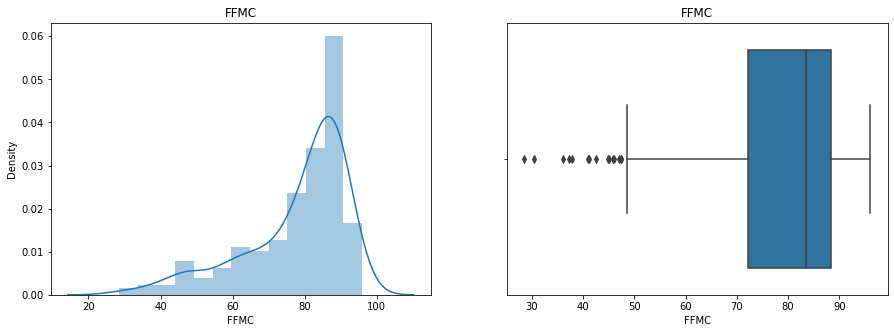

<Figure size 2160x1080 with 0 Axes>

In [7]:
plot_dist("FFMC",df)

In [8]:
#handeling the outliers with respect to FFMC 

In [9]:
# as in FFMC distriution is skewed we are using IQR method

In [10]:
q1=df["FFMC"].quantile(0.25)
q3=df["FFMC"].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [11]:
lower_fence,upper_fence

(47.73750000000001, 112.63749999999999)

In [12]:
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [13]:
lower_extreme,upper_extreme

(23.40000000000002, 136.97499999999997)

In [14]:
df["FFMC"].describe()

count    244.000000
mean      77.887705
std       14.337571
min       28.600000
25%       72.075000
50%       83.500000
75%       88.300000
max       96.000000
Name: FFMC, dtype: float64

In [15]:
# theh upper range is not maching the max value .. we just need to remove outliers from lower side as  FFMC is left skewed

In [16]:
data=df.copy()
# making a copy of the data

In [17]:
data.loc[data["FFMC"]<=lower_fence,"FFMC"]=lower_fence

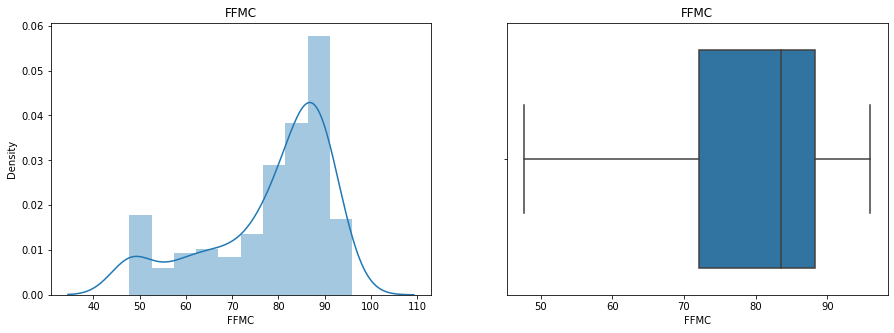

<Figure size 2160x1080 with 0 Axes>

In [18]:
plot_dist("FFMC",data)

- outliers are handeled in FFMC features

- **with respect to DMC**

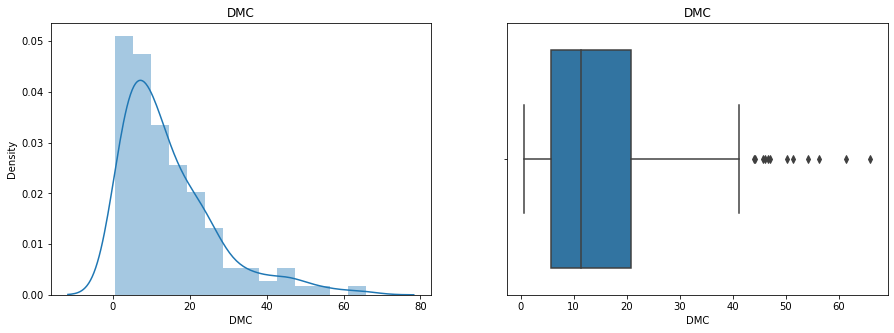

<Figure size 2160x1080 with 0 Axes>

In [19]:
plot_dist("DMC",df)

In [20]:
q1=df["DMC"].quantile(0.25)
q3=df["DMC"].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [21]:
lower_fence,upper_fence

(-16.624999999999996, 43.175)

In [22]:
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [23]:
# extreme outliers
lower_extreme,upper_extreme

(-39.05, 65.6)

In [24]:
df["DMC"].describe()

count    244.000000
mean      14.673361
std       12.368039
min        0.700000
25%        5.800000
50%       11.300000
75%       20.750000
max       65.900000
Name: DMC, dtype: float64

In [25]:
data.loc[data["DMC"]>=upper_fence,"DMC"]=upper_fence

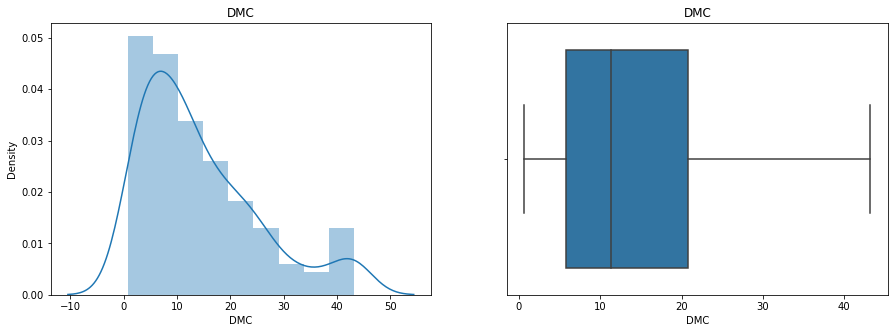

<Figure size 2160x1080 with 0 Axes>

In [26]:
plot_dist("DMC",data)

- **with respect to DC**

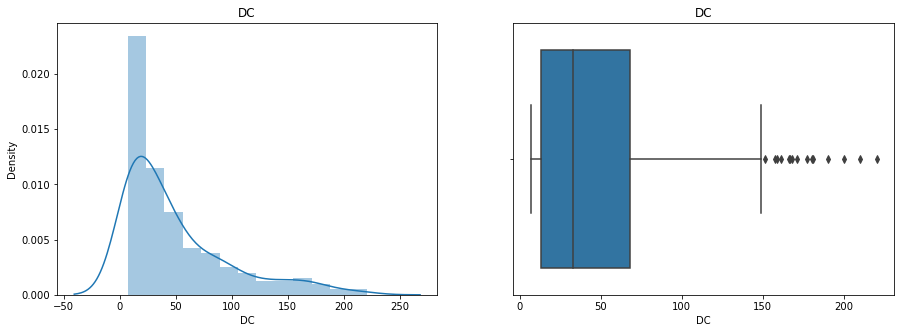

<Figure size 2160x1080 with 0 Axes>

In [27]:
plot_dist("DC",df)

In [28]:
q1=df["DC"].quantile(0.25)
q3=df["DC"].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [29]:
lower_fence,upper_fence

(-69.03750000000002, 150.46250000000003)

In [30]:
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [31]:
# extreme values 
lower_extreme,upper_extreme

(-151.35000000000002, 232.77500000000003)

In [32]:
df["DC"].describe()

count    244.000000
mean      49.288484
std       47.619393
min        6.900000
25%       13.275000
50%       33.100000
75%       68.150000
max      220.400000
Name: DC, dtype: float64

In [33]:
data.loc[data["DC"]>=upper_fence,"DC"]=upper_fence

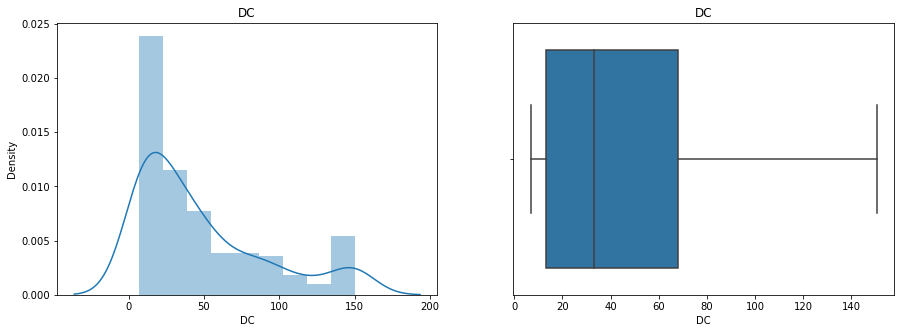

<Figure size 2160x1080 with 0 Axes>

In [34]:
plot_dist("DC",data)

- **with respect to BUI**

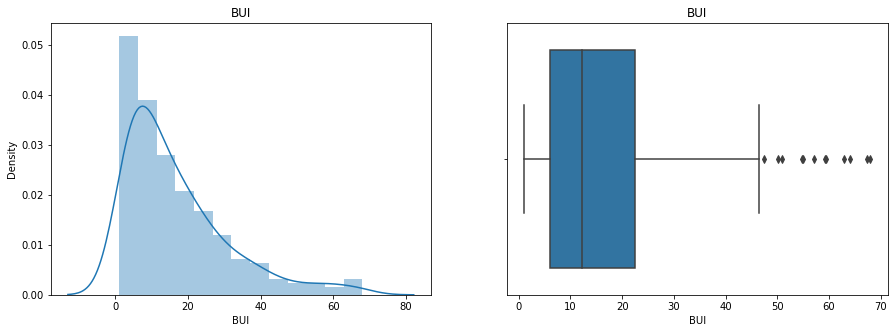

<Figure size 2160x1080 with 0 Axes>

In [35]:
plot_dist("BUI",df)

In [36]:
q1=df["BUI"].quantile(0.25)
q3=df["BUI"].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [37]:
lower_fence,upper_fence

(-18.787499999999998, 47.3125)

In [38]:
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [39]:
# extreme values 
lower_extreme,upper_extreme

(-43.574999999999996, 72.1)

In [40]:
df["BUI"].describe()

count    244.000000
mean      16.664754
std       14.204824
min        1.100000
25%        6.000000
50%       12.250000
75%       22.525000
max       68.000000
Name: BUI, dtype: float64

In [41]:
data.loc[data["BUI"]>=upper_fence,"BUI"]=upper_fence

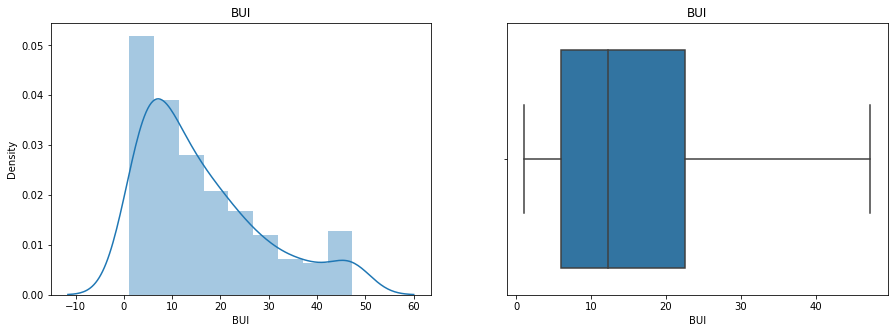

<Figure size 2160x1080 with 0 Axes>

In [42]:
plot_dist("BUI",data)

- **with respect to Rain**

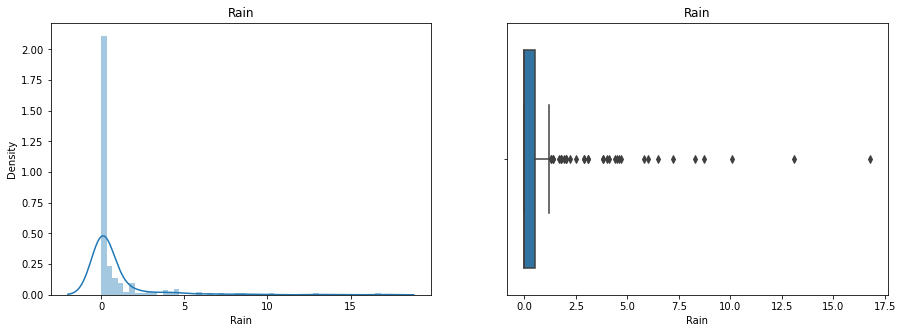

<Figure size 2160x1080 with 0 Axes>

In [43]:
plot_dist("Rain",df)

In [44]:
q1=df["Rain"].quantile(0.25)
q3=df["Rain"].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [45]:
lower_fence,upper_fence

(-0.75, 1.25)

In [46]:
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [47]:
# extreme values 
lower_extreme,upper_extreme

(-1.5, 2.0)

In [48]:
df["Rain"].describe()

count    244.000000
mean       0.760656
std        1.999406
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max       16.800000
Name: Rain, dtype: float64

In [49]:
data.loc[data["Rain"]>=upper_extreme,"Rain"]=upper_extreme

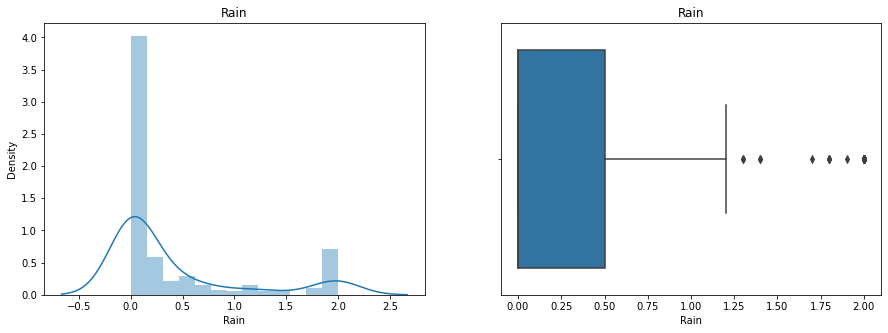

<Figure size 2160x1080 with 0 Axes>

In [50]:
plot_dist("Rain",data)

- **with respect to Temperature**

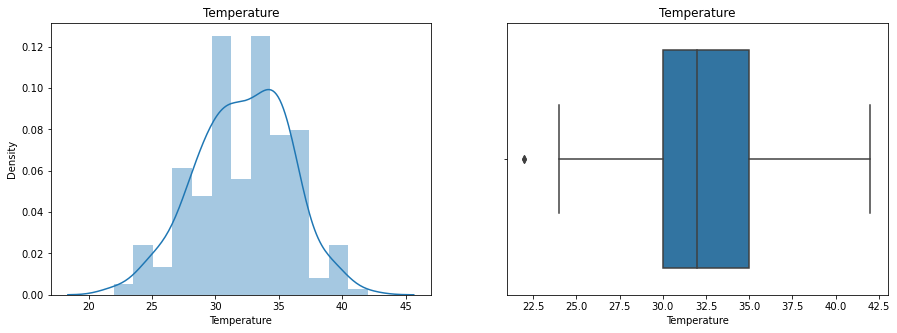

<Figure size 2160x1080 with 0 Axes>

In [51]:
plot_dist("Temperature",df)

In [52]:
#distribution is almost normal

In [53]:
Temp_mean=df.Temperature.mean()
Temp_mean

32.17213114754098

In [54]:
upper_boundary=Temp_mean +3*df.Temperature.std()
lower_boundary=Temp_mean -3*df.Temperature.std()

In [55]:
upper_boundary,lower_boundary

(43.073660927726394, 21.270601367355567)

In [56]:
data.loc[data["Temperature"]<=lower_boundary,"Temperature"]=lower_boundary

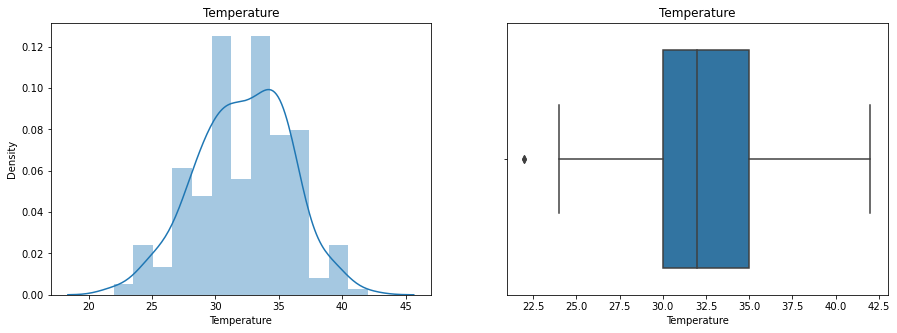

<Figure size 2160x1080 with 0 Axes>

In [57]:
plot_dist("Temperature",data)

In [58]:
# now we are good to go

- **handling null values**

In [59]:
data.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            1
Classes        1
Region         0
dtype: int64

## spliting the data before performing any operation

In [60]:
from sklearn.model_selection import StratifiedShuffleSplit

##### spliting the data based on the region

In [61]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)
for train_index,test_index in split.split(data,data["Region"]):
    strat_train_set=data.loc[train_index]
    strat_test_set=data.loc[test_index]

In [62]:
strat_train_set["Region"].value_counts()

1    85
0    85
Name: Region, dtype: int64

In [63]:
strat_test_set["Region"].value_counts()

1    37
0    37
Name: Region, dtype: int64

In [64]:
x_train=strat_train_set.drop("Classes",axis=1)

In [65]:
y_train=strat_train_set["Classes"]

In [66]:
x_test=strat_test_set.drop("Classes",axis=1)

In [67]:
y_test=strat_test_set["Classes"]

### handeling null values in FWI (continious) and  in Region (discrete)

In [68]:
# for FWI   we are using median  to handel the null values
# for Region  we are filling the null values with the mode
median_FWI=x_train["FWI"].median()

In [69]:
median_FWI

4.0

In [70]:
x_train["FWI"].fillna(median_FWI,inplace=True)

In [71]:
x_test["FWI"].fillna(median_FWI,inplace=True)

In [72]:
y_train.isna().sum()
# replacing it with mode


1

In [73]:
mode_classes=str(y_train.mode().values[0])
mode_classes

'fire'

In [74]:
y_train.fillna(mode_classes,inplace=True)

In [75]:
y_train.isna().sum()

0

In [76]:
y_test.isna().sum()

0

### encoding the categorical data

##### with respect to classes we are dealing with nominal data with two categories .. so we are going to use one hot encoding

In [77]:
x_train.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
58,29,7,2012,32.0,73,15,0.0,86.6,26.7,127.0,5.6,35.0,11.9,1
126,5,6,2012,32.0,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0
144,23,6,2012,33.0,59,16,0.8,74.2,7.0,8.3,1.6,6.7,0.8,0
202,20,8,2012,36.0,81,15,0.0,83.7,34.4,107.0,3.8,38.1,9.0,0
20,21,6,2012,30.0,78,14,0.0,81.0,6.3,31.6,2.6,8.4,2.2,1


In [78]:
y_train.head()

58         fire
126    not fire
144    not fire
202        fire
20         fire
Name: Classes, dtype: object

In [79]:
y_train=pd.get_dummies(y_train,drop_first=True)
y_test=pd.get_dummies(y_test,drop_first=True)

In [80]:
y_train.head()

,not fire
58,0
126,1
144,1
202,0
20,0


# sampling (oversampling techniques)

Always split into test and train sets BEFORE trying oversampling techniques! Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets.

In [81]:
y_train.value_counts()

not fire
0           94
1           76
dtype: int64

In [82]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
X_res, y_res = os.fit_resample(x_train,y_train)

In [83]:
y_res.value_counts()

not fire
0           94
1           94
dtype: int64

In [84]:
X_res.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,7,2012,32.0,73,15,0.0,86.6,26.7,127.0,5.6,35.0,11.9,1
1,5,6,2012,32.0,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0
2,23,6,2012,33.0,59,16,0.8,74.2,7.0,8.3,1.6,6.7,0.8,0
3,20,8,2012,36.0,81,15,0.0,83.7,34.4,107.0,3.8,38.1,9.0,0
4,21,6,2012,30.0,78,14,0.0,81.0,6.3,31.6,2.6,8.4,2.2,1


In [85]:
y_res.head()

,not fire
0,0
1,1
2,1
3,0
4,0


In [86]:
X_res.shape,y_res.shape

((188, 14), (188, 1))

### Feature selection

##### Drop Constant Features Using Variance Threshold

In [87]:
### It will remove  zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_res) # you ave to do fit on x_train

VarianceThreshold(threshold=0)

In [88]:
var_thres.get_support()

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [89]:
sum(var_thres.get_support())

13

In [90]:
constant_columns = [column for column in X_res.columns
                    if column not in X_res.columns[var_thres.get_support()]]

print(len(constant_columns))

1


In [91]:
for column in constant_columns:
    print(column)

year


In [92]:
X_res=X_res.drop(constant_columns,axis=1)

In [93]:
x_test=x_test.drop(constant_columns,axis=1)

In [94]:
X_res.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,7,32.0,73,15,0.0,86.6,26.7,127.0,5.6,35.0,11.9,1
1,5,6,32.0,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0
2,23,6,33.0,59,16,0.8,74.2,7.0,8.3,1.6,6.7,0.8,0
3,20,8,36.0,81,15,0.0,83.7,34.4,107.0,3.8,38.1,9.0,0
4,21,6,30.0,78,14,0.0,81.0,6.3,31.6,2.6,8.4,2.2,1


In [95]:
x_test.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
108,17,9,31.0,52,14,0.0,87.7000,6.400,24.3,6.2,7.7,5.9,1
40,11,7,33.0,76,14,0.0,81.1000,8.100,18.7,2.6,8.1,2.2,1
0,1,6,29.0,57,18,0.0,65.7000,3.400,7.6,1.3,3.4,0.5,1
214,1,9,29.0,86,16,0.0,47.7375,0.900,8.2,0.1,1.4,0.0,0
173,22,7,32.0,48,18,0.0,91.5000,43.175,90.1,13.2,44.0,25.4,0


##### pearson correlation

In [96]:
# if two  features are highly correlated ( not w.r.t target i m saying ) .then we can drop one of the feature as it is doing the same thing , for that we specify some threshold value

In [97]:
# taking a threshold value --> given by domain expert
# the time being we are taking threshold =0.95

In [98]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [99]:
# giving threshold 60 percent for the time 
threshold=0.95

In [100]:
correlation(X_res.iloc[:,:-1],threshold)

{'BUI'}

In [101]:
# so we are going to drop it

In [102]:
X_res=X_res.drop('BUI',axis=1)
x_test=x_test.drop('BUI',axis=1)

##### information gain

In [103]:
# from sklearn.feature_selection import mutual_info_classif # for classification
from sklearn.feature_selection import mutual_info_regression # for regression problem


In [104]:
mutual_info=mutual_info_regression(X_res,y_res)

In [105]:
mutual_data=pd.Series(mutual_info,index=X_res.columns)

In [106]:
mutual_data.sort_values(ascending=False)

ISI            0.661891
FFMC           0.660797
FWI            0.608379
DMC            0.358973
DC             0.330094
Rain           0.320652
Temperature    0.187416
RH             0.138092
month          0.029517
Ws             0.019363
day            0.012365
Region         0.000000
dtype: float64

In [ ]:
# droping day as it is not contribution anything

In [108]:
X_res=X_res.drop(columns=["day"],axis=1)

In [107]:
x_test=x_test.drop(columns=["day"],axis=1)

In [109]:
# we do feature  selection w.r.t our training data only then remove from train and test.. to avoid overfitting

##### feature Importance

In [110]:
# This technique gives you a score for each feature of your data,the higher the score mor relevant it is

In [111]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X_res,y_res)

ExtraTreesClassifier()

In [112]:
print(model.feature_importances_)

[0.00919832 0.04173683 0.03547285 0.01421082 0.09853139 0.2453358
 0.09727343 0.08215011 0.18237383 0.18484561 0.00887099]


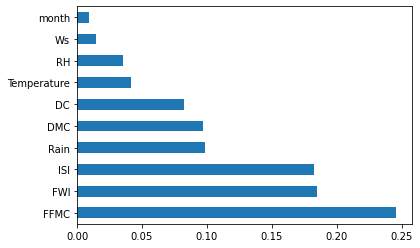

In [113]:
ranked_features=pd.Series(model.feature_importances_,index=X_res.columns)
ranked_features.nlargest(10).plot(kind="barh")
plt.show()

In [114]:
# these are the important features for our model so we are sticking to them 

In [115]:
X_res.head()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Region
0,7,32.0,73,15,0.0,86.6,26.7,127.0,5.6,11.9,1
1,6,32.0,60,14,0.2,77.1,6.0,17.6,1.8,0.9,0
2,6,33.0,59,16,0.8,74.2,7.0,8.3,1.6,0.8,0
3,8,36.0,81,15,0.0,83.7,34.4,107.0,3.8,9.0,0
4,6,30.0,78,14,0.0,81.0,6.3,31.6,2.6,2.2,1


In [116]:
y_res.head()

,not fire
0,0
1,1
2,1
3,0
4,0


In [117]:
x_test.head()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Region
108,9,31.0,52,14,0.0,87.7000,6.400,24.3,6.2,5.9,1
40,7,33.0,76,14,0.0,81.1000,8.100,18.7,2.6,2.2,1
0,6,29.0,57,18,0.0,65.7000,3.400,7.6,1.3,0.5,1
214,9,29.0,86,16,0.0,47.7375,0.900,8.2,0.1,0.0,0
173,7,32.0,48,18,0.0,91.5000,43.175,90.1,13.2,25.4,0


In [118]:
y_test.head()

,not fire
108,0
40,1
0,1
214,1
173,0


## Target vs independent feature

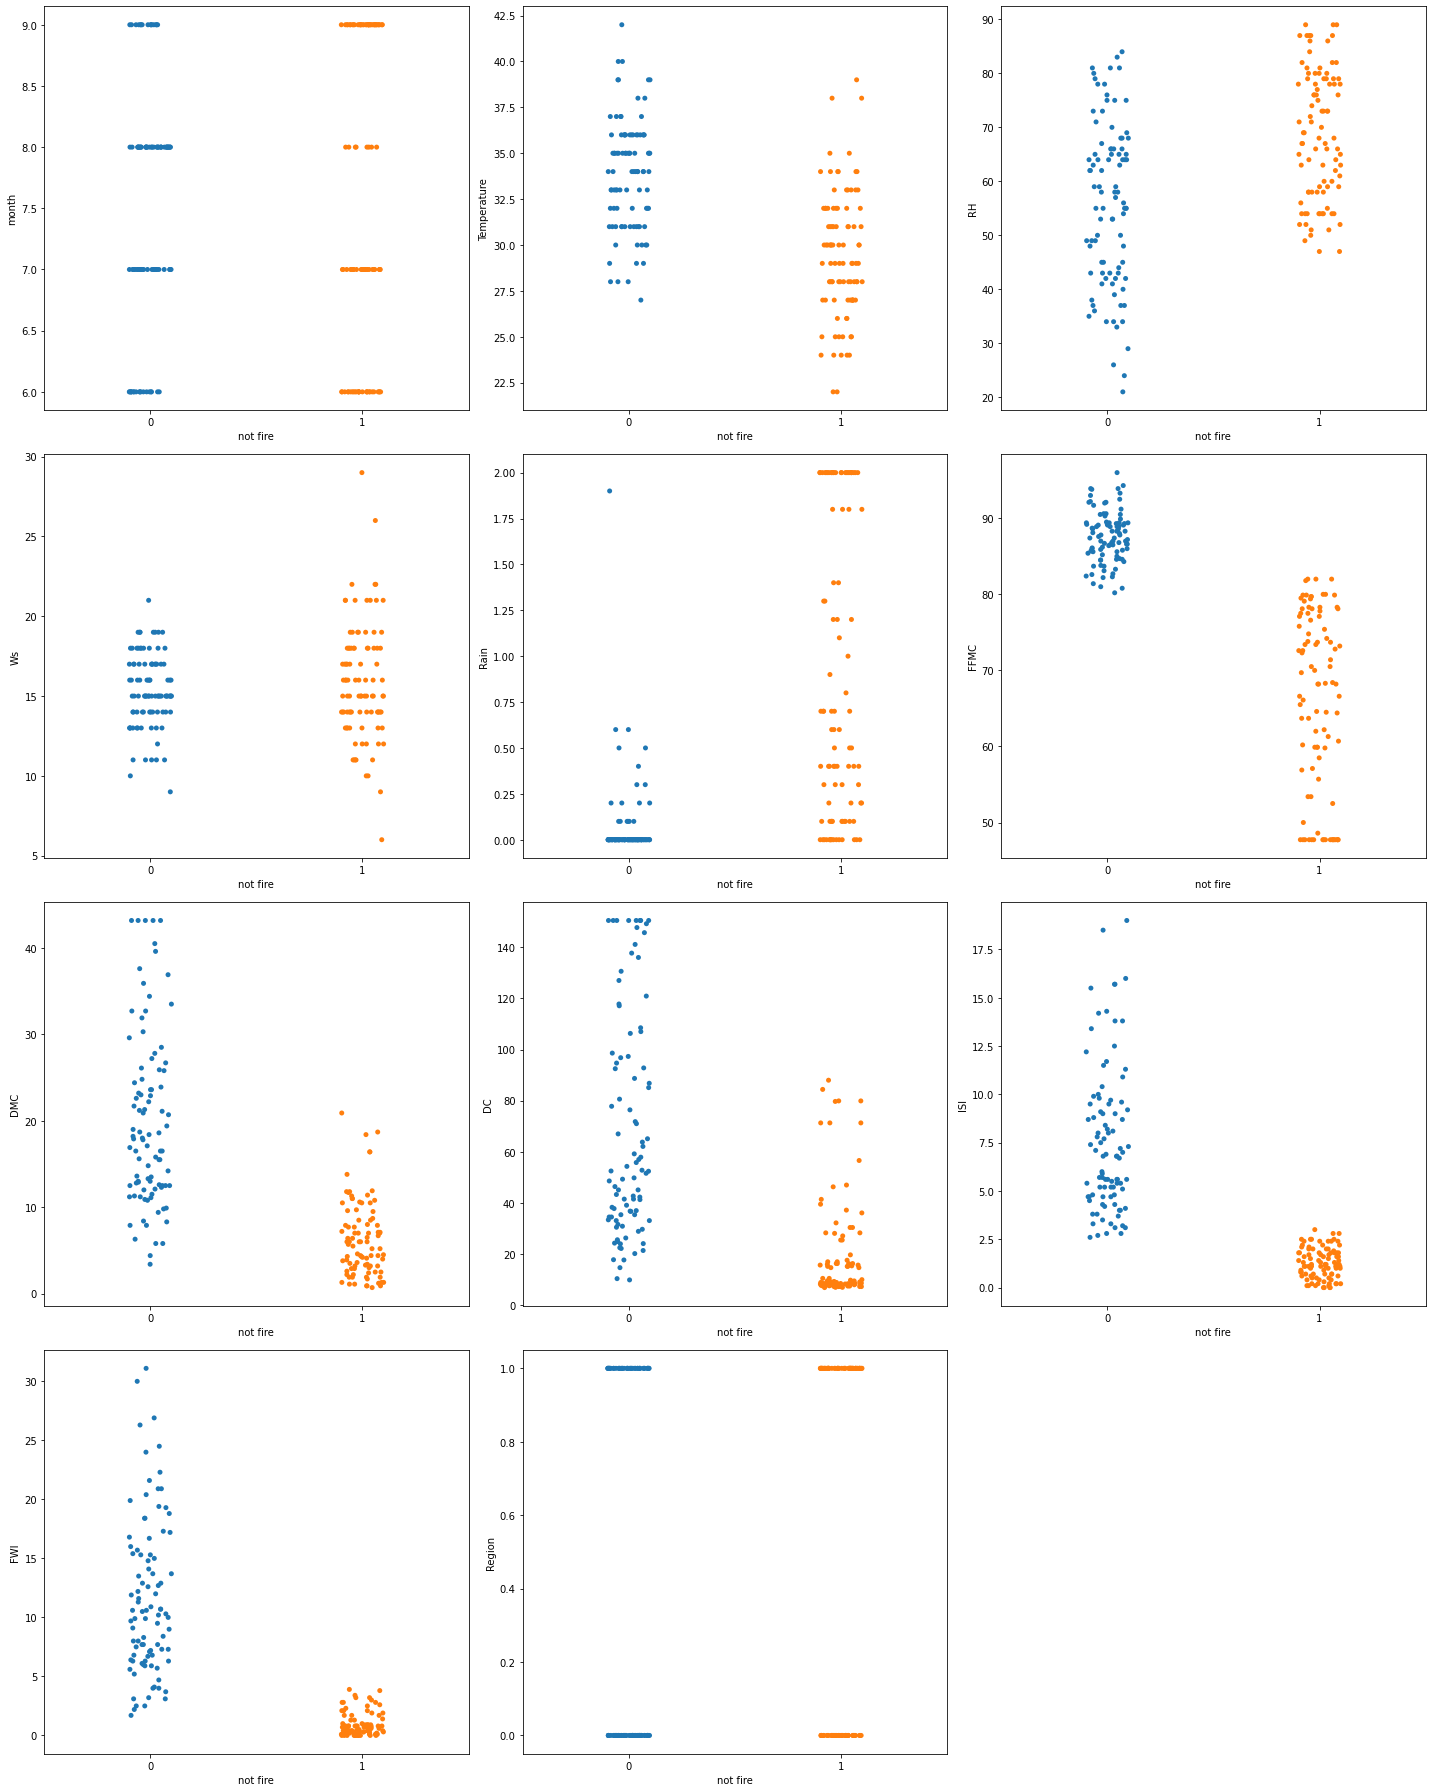

In [119]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X_res.columns:
    if plotnumber<=12 :
        ax = plt.subplot(4,3,plotnumber)
        sns.stripplot(y_res["not fire"],X_res[column])
    plotnumber+=1
plt.tight_layout()

## standardize the datasets

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.

z=(x-x_mean)/std

In [120]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
s_x_train=scaler.fit_transform(X_res)
s_x_test=scaler.transform(x_test)

## model Training

#### model building

In [121]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(s_x_train,y_res)

LogisticRegression()

In [123]:
y_pred = log_reg.predict(s_x_test)

In [124]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

**accuracy**

In [125]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9594594594594594

**Confusion Matrix**

In [126]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[43,  1],
       [ 2, 28]], dtype=int64)

In [127]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [128]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)

**Precison**

In [129]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9772727272727273

**Recall**

In [130]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.9555555555555556

**F1 Score**

In [131]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9662921348314608